Import statements:

In [2]:
import pickle, gzip, numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import random

Importing the MNIST dataset:

In [57]:
def plotImages(X):
    if X.ndim == 1:
        X = np.array([X])
    numImages = X.shape[0]
    numRows = math.floor(math.sqrt(numImages))
    numCols = math.ceil(numImages/numRows)
    for i in range(numImages):
        reshapedImage = X[i,:].reshape(28,28)
        plt.subplot(numRows, numCols, i+1)
        plt.imshow(reshapedImage, cmap = cm.Greys_r)
        plt.axis('off')
    plt.show()

def readPickleData(fileName):
    f = gzip.open(fileName, 'rb')
    data = pickle.load(f, encoding='latin1')
    f.close()
    return data

def getMNISTData():
    trainSet, validSet, testSet = readPickleData('mnist.pkl.gz')   
    trainX, trainY = trainSet
    validX, validY = validSet
    trainX = np.vstack((trainX, validX))
    trainY = np.append(trainY, validY)
    testX, testY = testSet
    return (trainX, trainY, testX, testY)

def plotImagesHorizontal(X):
    if X.ndim == 1:
        X = np.array([X])
    numImages = X.shape[0]
    numRows = 1
    numCols = numImages
    for i in range(numImages):
        reshapedImage = X[i,:].reshape(28,28)
        plt.subplot(numRows, numCols, i+1)
        plt.imshow(reshapedImage, cmap = cm.Greys_r)
        plt.axis('off')
    plt.show()

(trainX, trainY, testX, testY) = getMNISTData()

We print out the first 20 digits of the MNIST training dataset to get a feel for the dataset:

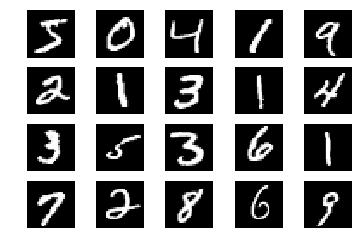

In [58]:
plotImages(trainX[0:20,:])

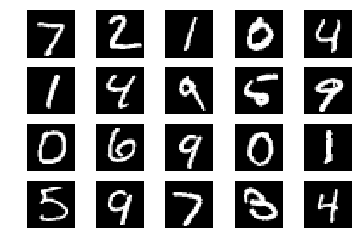

In [59]:
plotImages(testX[0:20,:])

For our first proof of concept, we will store one of each of the 9 digits in associative memory:

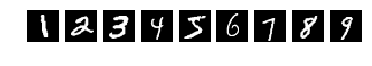

In [60]:
digits = [6, 5, 7, 26, 0, 18, 42, 17, 43]

plotImagesHorizontal(np.array([trainX[i] for i in digits]))

Next, we generate the coupling coefficients according to the following equation:

\begin{equation}
s_{ij} = \frac{1}{N} \sum_{m=1}^{M} \sigma_i^m \sigma_j^m
\end{equation}

In [61]:
s = np.zeros(shape=(784,784))

# converts digits to 1s and -1s
return_abs = lambda x: -1 if x > 0 else 1

# grabs the absolute values for each item in the array for mnist digit
get_abs = lambda x: np.array([return_abs(i) for i in trainX[x]])

# stores one of each digit
data = np.array([get_abs(i) for i in digits])

# grabs the coupling coefficients
for i in range(784):
    for j in range(784):
        total = 0
        for k in range(len(data)):
            total += data[k][i] * data[k][j]
        s[i][j] = 1/784 * total

We run the first digit in the test set and see what item in associative memory it matches with from the 9 digits stored from the training set:

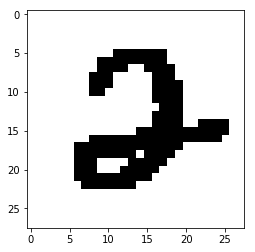

In [62]:
test = np.array([return_abs(i) for i in trainX[16]])
test_resized = np.array(test).reshape(28, 28)
plt.imshow(test_resized, cmap = cm.Greys_r)

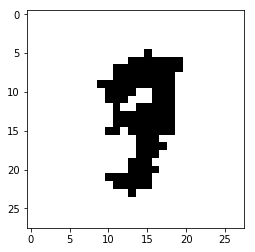

In [63]:
V = test # this is the initial state (I guess it's the where the tested image goes)
new_V = np.ones(784)

for i in range(784):
    total = 0
    for j in range(784):
        total += s[i][j] * V[j]
#     print(total)
    
    # total signed total is just y
    if total >= 0:
        new_V[i] = 1
    else:
        new_V[i] = -1

V = new_V
# print(V)
sigma_test_resized = np.array(V).reshape(28, 28)
plt.imshow(sigma_test_resized, cmap = cm.Greys_r)